# <div style="text-align: center; color: cyan">Load an Image Classification Dataset</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

## <div style="text-align: center; color: lime">Imports</div>

In [24]:
from pathlib import Path

from matplotlib import pyplot as plt

import torch
from torch.utils.data import random_split, DataLoader

from torchvision.datasets import ImageFolder
from torchvision import transforms

import kagglehub


## <div style="text-align: center; color: lime">Get Data from Kaggle</div>

In [3]:
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

print(path)

/Users/ramin/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3


In [4]:
!ls {path}

challenges.csv   ground_truth.csv tom_and_jerry


In [5]:
!ls {path}/tom_and_jerry

tom_and_jerry


In [6]:
!ls {path}/tom_and_jerry/tom_and_jerry

jerry       tom         tom_jerry_0 tom_jerry_1


In [8]:
data_path = Path(path) / "tom_and_jerry/tom_and_jerry"


## <div style="text-align: center; color: lime">ImageFolder</div>

In [19]:
all_data = ImageFolder(data_path)

0


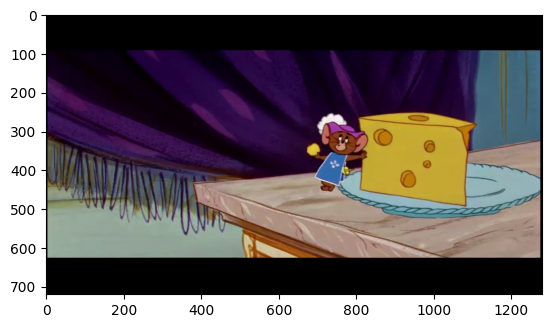

In [20]:
for image, label in all_data:
    plt.figure()
    plt.imshow(image)
    print(label)
    break

## <div style="text-align: center; color: lime">Transforms</div>

In [21]:
all_data = ImageFolder(data_path)

for image, label in all_data:
    print(image.size)
    break

(1280, 720)


In [22]:
transform = transforms.Resize((90, 160))

all_data = ImageFolder(data_path, transform=transform)

for image, label in all_data:
    print(image.size)
    break


(160, 90)


In [23]:
trs = transforms.Compose(
    [
        transforms.Resize((90, 160)),
        transforms.ToTensor(),
    ]
)

all_data = ImageFolder(data_path, transform=trs)

for image, label in all_data:
    print(type(image))
    print(image.shape)
    break

<class 'torch.Tensor'>
torch.Size([3, 90, 160])


## <div style="text-align: center; color: lime">Split to Train, Validation, and Test</div>

In [25]:
g1 = torch.Generator().manual_seed(20)
train_data, val_data, test_data = random_split(all_data, [0.7, 0.2, 0.1], g1)

In [29]:
print(f"all_data's size: {len(all_data)}")
print(f"train_data's size: {len(train_data)}")
print(f"val_data's size: {len(val_data)}")
print(f"test_data's size: {len(test_data)}")

all_data's size: 5478
train_data's size: 3835
val_data's size: 1096
test_data's size: 547


## <div style="text-align: center; color: lime">DataLoader</div>

In [30]:
train_loader = DataLoader(train_data, batch_size=12, shuffle=True)
val_loader = DataLoader(val_data, batch_size=12, shuffle=False)
test_loader = DataLoader(test_data, batch_size=12, shuffle=False)

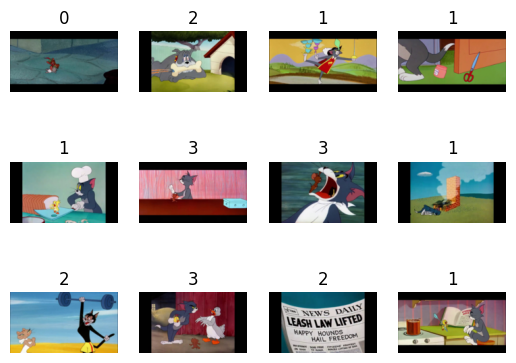

In [36]:
fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for images, labels in train_loader:
    for i, (image, label) in enumerate(zip(images, labels)):
        axes_ravel[i].imshow(transforms.ToPILImage()(image))
        axes_ravel[i].set_axis_off()
        axes_ravel[i].set_title(f"{label}")
    break

<p style="text-align: center; font-family: "Trebuchet MS", sans-serif; color: #888; font-size: 0.9em; margin-top: 2em; border-top: 1px solid #ccc; padding-top: 0.5em;">
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</p>

<div style="text-align: center">
<a style="margin: 1em" href="https://literallytheone.github.io">https://literallytheone.github.io</a>
</div>
